In [1]:
using Plots, Interact, DifferentialEquations, BifurcationKit, Setfield, ForwardDiff
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

# Formas Normales, panorama general

Las bifurcaciones corresponden a cambios cualitativos en la dinámica, o la estructura topológica, de los sistemas dinámicos. Pero cuando nos referimos a "cambios" son cambios desde fuera, al modificar los parámetros del sistema modificamos el sistema dinámico. 

Podemos adoptar un punto de vista más general para entender como se producen esos cambios si consideramos a un sistema dinámico como función de un parámetro (hasta ahora todas bifurcaciones que vimos las cruzábamos variando un único parámetro). En ese caso tenemos que  considerar ahora los **campos vectores como función de las variables y el parámetro de bifurcación** ($\mu$) , es decir que vamos a escribir para flujos 1D:

$\dot{x}=f(x,\mu)$

Por ejemplo, para el caso de la forma normal de la pitchfork $f(x,\mu)=\mu x-x^3$. 

Y vamos a suponer tambien que el punto $x=0$ es un punto fijo y que la bifurcación se produce para el valor de parámetro $\mu=0$ (esto siempre se puede hacer con un cambio lineal de variables). En ese caso tenemos para el punto fijo $f(0,0)=0$ las siguioentes condiciones para las bifurcaciones que ocurren sobre una variedad unidimensional:

- la condición de que un autovalor del flujo linealizado se haga cero $\lambda=0$, lo que equivale a decir que la derivada del campo vector respecto a la variable sea cero , es decir $\partial_x f(0,0)=0$. Notar que usamos la derivada parcial porque ahora hicimos depender nuestro campo vector del parámetro de forma explícita. Esta también se conoce como la condición de **no hiperbolicidad**. Recordar que los puntos hiperbolicos eran aquellos con autovalores estrictamente positivos o negativos.
- existen dos condiciones adicionales. La primera se llama condición de **transversalidad** y requiere que en la función $f(x,\mu)$ corte al plano horizontal $f=0$ de forma transversal, es decir que no se anule tambien su derivada respecto del parametro.
- la segunda es la condicion de **no degeneracion** y requiere que la derivada segunda de $f$ (respecto de x) sea diferente de cero.

Si tomamos un punto fijo de sistema dinámico cualquiera, con un valor arbitrario de $\mu$, **lo genérico es que sea hiperbólico**. También se dice que en un entorno de ese punto fijo el sistema es **robusto** o **estructuralmente estable**. Si lo perturbamos en $\mu$ su dinámica no cambia de forma cualitativa. En ese caso la linealización me determina la dinámica en su entorno y no hay nada novedoso. 

Las cosas interesantes empezan a pasar con la pérdida de genericidad. La primera es la condición de **no hiperbolicidad**. En ese caso aparece la bifurcación. La condición no es genérica porque que hay que sintonizar al parámetro para acertarle a la bifurcación. Y en ese punto el sistema no es estructuralmente estable, si lo perturbamos cambia la estructura topológica del flujo. 

Si solo permitimos esa perdida de genericidad tenemos una bifurcación de **nodo silla**, siempre. Por eso se explicita que se deben cumplir otras dos condiciones de genericidad: la transversalidad y la no degeneración. 

Pero podemos seguir perdiendo genericidad y ver que pasa. Si la posicion del punto fijo no varía con el parámetro se viola la condición de tranversalidad. Y entonces tenemos la bifurcación **transcrítica** (que es una bifurcación con un punto fijo que no se mueve en el espacio de parámetros).

Si ahora además imponemos una simetría en nuestro sistema, eso viola la condición de no degeneración porque anula la derivada segunda del campo vector, y tenemos la bifurcación de **pitchfork**.
                    
Podemos entonces resumir lo que tenemos hasta ahora para las **bifurcaciones locales** en términos de las condiciones para que se produzcan y la forma normal correspondiente. 

| Bifurcacion 	| Descripcion | No hiperbolicidad   | Transversalidad 	| No degeneración | Forma Normal      |
|---------------|:--------------:|:--------------:|:----------:|:----------:|:-------------:|
| Saddle Node 	| un autovalor cero |$\partial_x f(0,0)=0$ | $\partial_\mu f(0,0)\neq0$|$\partial_{xx} f(0,0)\neq0$ | $\dot{x}=\mu-x^2$|
| Transcritica 	| un autovalor cero |$\partial_x f(0,0)=0$ | $\partial_\mu f(0,0)=0$|$\partial_{xx} (0,0)\neq0$ | $\dot{x}=\mu x-x^2$|
| Pitchfork  	|  un autovalor cero | $\partial_x f(0,0)=0$ | $\partial_\mu f(0,0)=0$| $\partial_{xx} (0,0)=0$ | $\dot{x}=\mu x-x^3$|
| Hopf 	        | par de autovalores imaginarios| $\lambda_{1,2}=\pm i\omega$| $\partial_\mu \beta(0)\neq0$|$l_1(0)\neq0$|$\dot{\rho}=\beta \rho-\rho^3$|

Agregamos tambien la bifurcacion de **Hopf**, si bien las condiciones de transversalidad y no degeneracion son un poco diferentes. Si escribimos el autovalor como $\lambda_{1,2}(\mu)=\beta(\mu)\pm i \omega(\mu)$ donde $\mu$ es el parámetro de la bifurcación, la condición de transversalidad requiere que la derivada de la parte real del autovalor (en un sistema 2D es la traza del jacobiano) cruce el eje imaginario tranversalmente. La condicion de no degeneración es mucho mas complicada de calcular ya que el parametro $l_1(\mu)$ depende de las derivadas de segundo y tercer orden del campo vector. 

## Normalizacion y Forma normal inducida.

Pero de donde sale la forma normal? 

Recordamos que la forma normal para una bifurcación de un punto fijo es la forma más simple posible del campo vector, es decir con la menor cantidad posible de términos no lineales, que es topológicamente equivalente al flujo original. Esa forma es universal, en el sentido de que si logramos reducir el comportamiento de nuestro sistema a esa forma podemos saber que el flujo se va a comportar de una determinada manera en un entorno del punto fijo. 

Pero por que aparecen algunos términos no lineales y no otros?

La respuesta a esa pregunta vamos a darla de forma totalmente informal (la respuesta formal excede este curso). Lo notable es que **es la parte lineal en la bifurcación la que determina cuales términos no lineales aparecen y cuáles no en la forma normal**. 

Para llegar a la forma normal el procedimiento es aplicar sucesivos cambios de coordenadas (en general no lineales) para tratar de eliminar la mayor cantidad posible de términos no lineales. Como esos cambios de coordenadas no me alteran la estructura topológica del flujo en un entorno del punto fijo puedo hacer los que sean necesarios para cancelar por ejemplo términos cuadráticos o cúbicos si fuese posible. El procedimiento se conoce como **normalización**

Lo interesante es que si el punto es hiperbólico, podemos, mediante cambios de coordenadas, eliminar **todos** los términos no lineales (esto es equivalente a lo que vimos cuando linealizamos los flujos 2D y es una enunciación ligera del Teorema de Hartman Grobman).

Cuando el punto fijo es no hiperbolico, segun como sea la parte lineal, van a haber términos que no se van a poder eliminar, son los llamados términos **resonantes**. POr ejemplo para la saddle node $x^2$ es el término resonante, o para primera ecuacion de la Hopf los términos $x^3$ y $xy^2$. Esos términos resonantes son los que hacen a la forma normal.

### Ejemplo motivador en 1D [opcional]

El algebra de esta parte parece complicada pero en realidad no es más que aplicar distributiva con ganas y ordenar términos.

Supongamos que tenemos el siguiente sistema 1D con $\lambda\neq0$:

$\dot{x}=\lambda x + a_2 x^2 + a_3 x^3 + ...$

donde $x=0$ es el punto fijo y es hiperbólico. Vamos a hacer un cambio de coordenadas "cercano a la identidad" con coeficientes a determinar:

$x=y+b_2 y^2 + b_3 y^3+...$

queremos que nuestro sistema en la nueva variable $y$ tenga la menor cantidad posible de términos no lineales y vamos a elegir a los coeficientes $b$ para ello. Comenzamos derivando al expresion anterior con respecto al tiempo (usando la regla de la cadena y sacando factor comun $\dot{y}$) e igualandola a la ecuación de arriba reemplazando $x$ por el polinomio en $y$:

$\dot{x}=\dot{y}(1+2b_2 y + 3b_3 y^2 + ...) = \lambda(y+b_2 y^2 + b_3 y^3+...)+a_2*(y+b_2 y^2 +...)^2+a_3(y+b_2 y^2+...)^3+...$

Despejamos $\dot{y}$ y desarrollamos los terminos hasta orden 3 agrupandolos por potencia de $y$:

$\dot{y} = \displaystyle\frac{\lambda y+y^2(\lambda b_2+a_2)+y^3(\lambda b_3 +2a_2b_2+a_3)+...}{(1+2b_2 y + 3b_3 y^2 + ...)}$

y ahora asumimos que $2b_2 y + 3b_3 y^2$ es pequeño cerca del origen y hacemos el desarrollo aproximado para un $\epsilon$ pequeño: $(1+\epsilon)^{-1}\approx 1-\epsilon$  y obtenemos, luego de distribuir y agrupar:

$\dot{y}=\lambda y +(a_2-\lambda b_2)y^2+(a_3-2\lambda b_2^2-2\lambda b_3)y^3 + ...$

como tenemos la libertad de elegir $b_2,b_3,$ etc. y $\lambda\neq0$, entonces podemos hacer $b_2=a_2/\lambda$ y eliminamos el término cuadrático. Con ese valor de $b_2$ podemos elegir un valor de $b_3$ tal que anule el paréntesis que acompaña al $y^3$ y no tenemos término cúbico. Y se puede proceder asi eligiendo los sucesivos térmonso del cambio de coordenadas y eliminar todos los terminos no lineales. 

Con lo cual mostramos (en un caso simplificado 1D) que el sistema no lineal $\dot{x}=\lambda x + a_2 x^2 + a_3 x^3 + ...$ con un punto fijo no hiperbólico en $x=0$ es topológicamente equivalente a un sistema lineal $\dot{y}=\lambda y$.

Pero que pasa cuando el punto fijo pierde hiperbolicidad $\lambda=0$? En ese caso **no podemos eliminar el término cuadrático y tenemos la bifurcación de saddle node**.

## Codimensiones mayores

Volviendo a la tabla de bifurcaciones podriamos preguntarnos que pasaría si siguiésemos perdiendo genericidad. Por ejemplo si tenemos más de un autovalor que se hace cero de forma simultánea, o no se cumple la condición de no degeneración de la Hopf, o el término cuadrático de la Saddle Node se hace cero. Esas bifurcaciones con menos genericidad se conocen como Bogdanov-Takens, Bautin y Cusp respectivamente.

Pero, como vamos a ver, para poder cruzar estas bifurcaciones no basta mover un parámetro sino que se tienen que sintonizar dos parámetros de forma simultánea.
Se trata de **bifurcaciones de codimensión 2**. Dicho muy llanamente, la codimensión de una bifurcación se corresponde con la cantidad de parámetros que hay que ajustar de forma simultánea para cruzarla. Todas las que vimos arriba son bifurcaciones de codimensión 1.

Si las bifurcaciones que vimos hasta ahora eran como paredes delgadas que separaban dos regiones topológicamente distintas, las bifurcaciones de codimensión 2 son como las aristas donde varias de estas paredes se juntan. 

En efecto, ahora nuestro espacio de parámetros es bidimensional, y en ese espacio de parámetros las bifurcaciones de codimensión 1 son curvas y las de codimensión 2 son puntos. 

Lo mas interesante de estas bifuraciones de codimensión mayor es que son como núcleos que organizan las bifurcaciones de codimensión menor, tanto locales como globales. Por ejemplo la Cusp es un punto en el espacio bidimensional de parámetros que da origen a dos bifurcaciones de saddle node, la Bautin a una Hop supercritica a una subcritica y a una saddle node de ciclos limites (global); y la Bogdanov-Takens a una Hopf, una saddle node y a una bifrucación homoclínica.

Con las bifurcaciones de codimensión 2 entramos en un meta-nivel. Si antes estudiabamos las bifurcaciones de codimensión 1 para ver como estaba organizado topológicamente nuestro espacio de fases, con las bifurcaciones de codimensión 2 vamos a entender como esta organizado nuestro espacio de parámetros con las distintas bifurcaciones.

# Bifurcaciones de Codimension 2: Cusp

Para tener una bifurcacion de codimension 2 no es necesario que haya dos variables. El modelo de crecimiento logistico con outbreak presenta como habiamos visto dos bifurcaciones de nodo silla. Esto sucede de forma general
si variamos el parametro $P$ para valores fijos de $K$ y $R$.Pero en realidad habiamos tenido que ajustar $K$ para que apareciesen esas bifurcaciones. 

Que sucede para diferentes valores de $K$? No siempre estan esas dos bifurcaciones.

$\dot{x} = Rx(1-x/K)-P\frac{x^2}{1+x^2}$


In [26]:
# Ecuacion Logistica con Outbreak
logoutbreak(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x*x/(1+x*x)

logoutbreak (generic function with 1 method)

Probar para valores de $K$ entre 5 y 5.5

In [27]:
F=(x,p) -> @. logoutbreak(x,(p,),0)
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)

@manipulate throttle=0.1 for K=5.0:0.01:8.0
    br1, = continuation(F,[6.5],[0.5,K,0.6],(@lens _[3]), opts)
    plot(br1,xlabel="P",title="Log con Outbreak",fmt=:png)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["K"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 301, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
151, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008c81eca0, Task (runnable) @0x000000008c81eca0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"5.0\",\"5.01\",\"5.02\",\"5.03\",\"5.04\",\"5.05\",\"5.06\",\"5.07\",\"5.08\",\"5.09\",\"5.1\",\"5.11\",\"5.12\",\"5.13\",\"5.14\",\"5.15\",\"5.16\",\"5.17\",\"5.18\",\"5.19\",\"5.2\",\"5.21\",\"5.22\",\"5.23

Como se ve, para valores de $K$ mayores a $5.2$ (aproximadamente) tenemos los dos puntos de bifurcacion y hay una region en la que tenemos tres puntos fijos. Esa region se va haciendo mas estrecha en torno a $P\approx0.77$ a medida que nos aproximamos a ese valor por arriba. Pero para $K=0.52$ y valores menores los dos puntos de bifurcacion desaparecen y tenemos siempre un solo punto fijo para todo valor de $P$.

Es decir que para un valor particular de $K$ cambia el diagrama de bifurcaciones 1D. En el modelo anterior dijimos que a pesar de tener varios parametros en realidad la bifurcacion se cruzaba moviendo uno solo de ellos (codimension 1) y esa bifurcacion en un espacio de parametros 2D correspondia a una curva. 

Como va a ser ahora el diagrama de bifurcaciones en el espacio $(P,K)$? Ciertamente no va a ser una curva sola porque hay dos bifurcaciones de nodo silla, pero ademas a medida que variamos $K$ esas dos curvas se van juntando (notar que los puntos de bifurcacion estan cada vez mas proximos) y cerca de $K=5.2$ deberian juntarse en un mismo punto y desaparecer(o colisionar). Atencion que no estamos hablando de puntos fijos lo que colisionan son dos puntos (o en realidad curvas en 2D) de bifurcacion. 

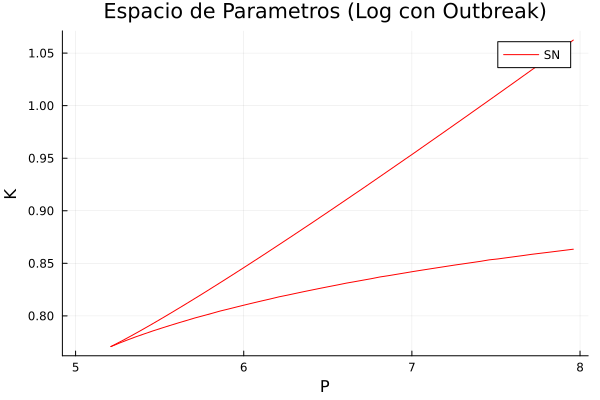

In [28]:
k = [8.01-0.05*n for n in 1:60]
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
br1, = continuation(F,[6.5],[0.5,k[1],0.6],(@lens _[3]), opts)
p1 = [br1.specialpoint[1].param]
p2 = [br1.specialpoint[2].param]
x1 = br1.specialpoint[1].x
x2 = br1.specialpoint[2].x
x = [br1.x]
p = [br1.param]
for n=2:60
    opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
    br1, = continuation(F,[6.5],[0.5,k[n],0.6],(@lens _[3]), opts)
    if length(br1.specialpoint)>0
        append!(p1,br1.specialpoint[1].param)
        append!(p2,br1.specialpoint[2].param)
        append!(x1,br1.specialpoint[1].x)
        append!(x2,br1.specialpoint[2].x)
    else    
        append!(p1,NaN)
        append!(p2,NaN)
        append!(x1,NaN)
        append!(x2,NaN)
    end
    append!(x,[br1.x])
    append!(p,[br1.param])
end
plot(k,p1,color=:red,label="SN",fmt=:png)
plot!(k,p2,color=:red,label="",xlabel="P",ylabel="K",title="Espacio de Parametros (Log con Outbreak)")

In [29]:
pl1=plot()
az = 60; el =30
@manipulate throttle=0.05 for az=0:5:90, el=0:5:90
    for n=1:60
        N = length(x[n])
        plot!(pl1,k[n]*ones(N,),p[n],x[n],color=:gray,alpha=0.1,legend=false,camera = (az,el))
    end    
    plot!(pl1,k,p1,x1,color=:red,legend=false,xlabel="K",ylabel="P",zlabel="x")
    plot!(pl1,k,p2,x2,color=:red,title="Log con Outbreak",fmt=:png)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["az"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 19, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008cf8dd20, Task (runnable) @0x000000008cf8dd20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"5\",\"10\",\"15\",\"20\",\"25\",\"30\",\"35\",\"40\",\"45\",\"50\",\"55\",\"60\",\"65\",\"70\",\"75\",\"80\",\"85\",\"90\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"17108013560585886964

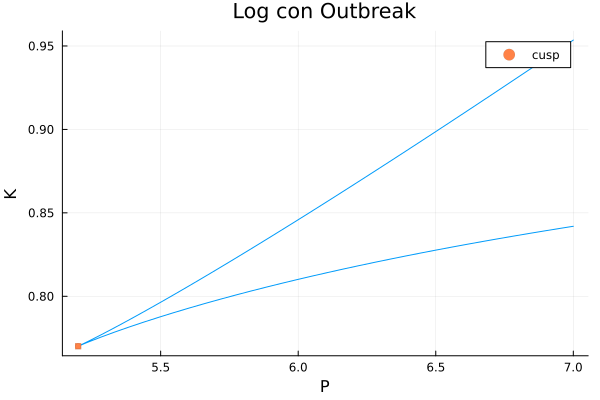

In [6]:
FJ = BifurcationKit.getJet(F; matrixfree=false)
opts = ContinuationPar(pMin=0.6,pMax=1.2, detectBifurcation=3)
br1, = continuation(FJ[1],FJ[2],[6.5],[0.5,7.0,0.6],(@lens _[3]), opts; recordFromSolution = (x, p) -> (x = x[1]))
opts2 =  ContinuationPar(opts, pMin=5.0,pMax=7.0, ds = -0.001, dsmax = 0.04)
br2, = continuation(FJ[1:2]..., br1, 1, (@lens _[2]), opts2; detectCodim2Bifurcation=2,updateMinAugEveryStep = 1)
plot(br2,xlabel="P",ylabel="K",title="Log con Outbreak",fmt=:png)

## Cusp forma Normal

El sistema anterior resulta sumamente arduo de resolver analiticamente, vamos a tomar un ejemplo mas sencillo dependiente de dos parametros (aunque no tiene una aplicacion directa) que tambien experimenta dos bifurcaciones de nodos silla que se juntan en un punto cusp en el espacio de parametros. En realidad el ejemplo es la "formal normal" de esta bifurcacion aunque en el curso no entramos en el detalle de lo que son las formas normales (al menos de manera formal), asi que por ahora podemos tomarla como la forma mas simple o universal.

El sistema es:

$\dot{x} = \mu_1 + \mu_2 x - x^3$ 

Vamos a evitarnos la tarea de calcular los puntos fijos (que implica resolver la cubica como en el caso anterior) e interpretar el miembro derecho (campo vector) geometricamente. Si recordamos la forma de la cubica (sin termino cuadratico) cuando estudiamos los puntos fijos del oscilador de Duffing, podia ser tipo "N" o no dependiendo de is el signo de la parte lineal con respecto a la cubica. En este caso la diferencia es que $\mu_1$ suma como una constante. Si tenemos $\mu_2>0$ la cubica forma una "N" y podemos tener uno o tres puntos fijos dependiendo del valor de $\mu_1$ que sube o baja la curva con un valor constante:

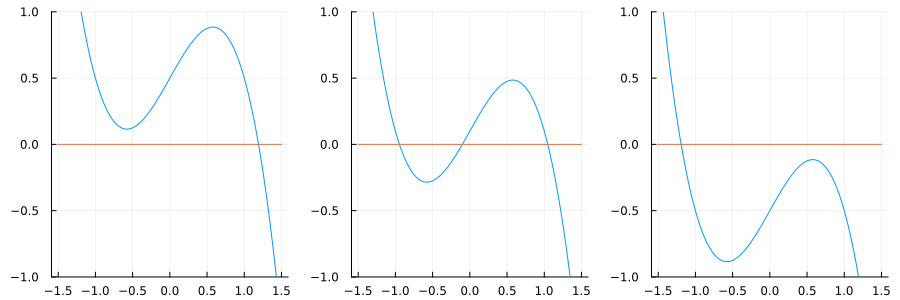

In [7]:
#ejemplo con mu2=1 y diferentes valores de mu1
x = -1.5:0.01:1.5
p1=plot(x,.5 .+x-x.^3,ylims=(-1,1));plot!(p1,[-1.5,1.5],[0,0],legend=false)
p2=plot(x,.1 .+x-x.^3,ylims=(-1,1));plot!(p2,[-1.5,1.5],[0,0],legend=false)
p3=plot(x,-.5 .+x-x.^3,ylims=(-1,1));plot!(p3,[-1.5,1.5],[0,0],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300),fmt=:png)

Podemos anticipar que van a ocurrir dos bifurcaciones de nodo silla cuando se pase de 1 a 3 puntos fijos y viceversa. Si en cambio $\mu_2<0$ La cubica esta "estirada" hay siempre un punto fijo (atractor, la pendiente es negativa) y no hay bifurcaciones.

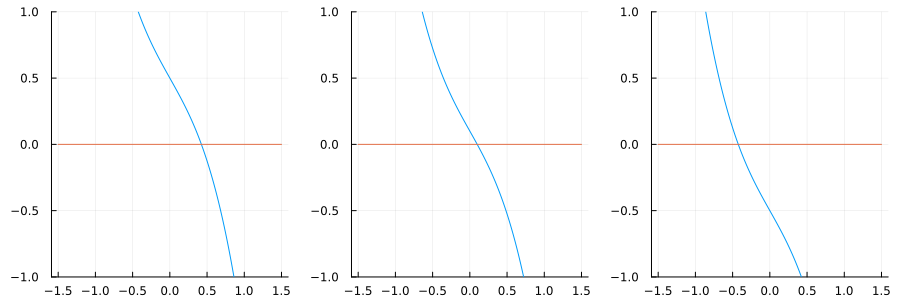

In [8]:
# ahora con mu2=-1
p1=plot(x,.5 .-x-x.^3,ylims=(-1,1));plot!(p1,[-1.5,1.5],[0,0],legend=false)
p2=plot(x,.1 .-x-x.^3,ylims=(-1,1));plot!(p2,[-1.5,1.5],[0,0],legend=false)
p3=plot(x,-.5 .-x-x.^3,ylims=(-1,1));plot!(p3,[-1.5,1.5],[0,0],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300),fmt=:png)

Por lo tanto podemos inferir que en algun punto las dos bifurcaciones de nodo silla van a tener que colisionar en un punto cusp. No es dificil ver en este caso que eso ocurre para $\mu_2=0$, $\mu_1=0$

Tampoco es dificil dibujar el diagrama de bifurcaciones. Vamos a dejar fijo $\mu_2$ por ahora y estudiar el diagrama de bifurcaciones en el plano ($\mu_1,x$) como haciamos con la bifurcaciones de codimension 1.

En ese caso recordemos que los puntos fijos corresponden con curvas que estan dadas de forma implicita por $f(x,\mu_1)=0$ donde $f$ es el miembro derecho de la ecuacion (el campo vector). En este caso es mucho mas facil despejar de forma explicita $\mu_1$ en funcion de $x$ (para un valor de  fijo).

$\mu_1(x) = x^3 - \mu_2 x$

que como antes si $\mu_2>0$ es una cubica con forma de "N" que se estira para el otro caso, pero acostada:

In [9]:
x = -1:0.01:1
μ2 =0.2
@manipulate for μ2=-1:0.01:1
    plot()
    if (μ2>0)
        x0 = sqrt(μ2/3)
        scatter!([-2*x0^3],[x0],color=:red)
        scatter!([2*x0^3],[-x0],color=:red)
    end   
    plot!(x.^3-μ2*x,x);plot!([-1,1],[0,0],xrange=(-0.5,0.5),legend=false,fmt=:png)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ2"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008c8bc200, Task (runnable) @0x000000008c8bc200), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.99\",\"-0.98\",\"-0.97\",\"-0.96\",\"-0.95\",\"-0.94\",\"-0.93\",\"-0.92\",\"-0.91\",\"-0.9\",\"-0.89\",\"-0.88\",\"-0.87\",\"-0.86\",\"-0.85\",\"-0.84\",\"-0.83\",\"-0.82\",\"-0.81\",\"-0.8\",\"

Ademas podemos calcular para que valores de ($\mu_1,x$) ocurren las bifurcaciones de nodo silla (en el caso de $\mu_2>0$). Solo tenemos que encontrar cuando la derivada de $\mu_1$ con respecto a $x$ se hace cero y eso sucede cuando $3x^2 = \mu_2$ o sea para los puntos: 

$x=-\sqrt{\mu_2/3}$ ,  $\mu_1=2\left( \sqrt{\mu_2/3}\right)^3$

$x=\sqrt{\mu_2/3}$ ,  $\mu_1=-2\left( \sqrt{\mu_2/3} \right)^3$

esos puntos estan representados en el grafico interactivo de arriba

Vamos ahora a trazar el diagrama de bifurcaciones completo en el espacio de parametros ($\mu_1,\mu_2$). Las curvas que determinan la bifurcacion de nodo silla en este espacio corresponden a los dos puntos calculados anteriormente pero ahora expresados como $\mu_1$ en funcion de $\mu_2$ en el dominio $\mu_2>0$ 

$\mu_1= \pm 2\left( \sqrt{\mu_2/3}\right)^3$

In [10]:
μ2list = 0:0.01:1
@manipulate throttle=.1 for μ2=-0.5:0.01:1
    p1 = plot(x.^3-μ2*x,x);plot!([-1,1],[0,0],xlims=(-0.5,0.5),legend=false)
    p2 = plot(-2*sqrt.(μ2list/3).^3,μ2list,xlims=(-0.5,0.5),legend=false,color=:red)
    p2 = plot!(2*sqrt.(μ2list/3).^3,μ2list,ylims=(-0.5,1),color=:red)
    if (μ2>0)
        x0 = sqrt(μ2/3)
        scatter!(p1,[-2*x0^3],[x0],color=:red)
        scatter!(p1,[2*x0^3],[-x0],color=:red)
        scatter!(p2,[-2*x0^3],[μ2],color=:red)
        scatter!(p2,[2*x0^3],[μ2],color=:red)
    else
        scatter!(p2,[0],[μ2],color=:gray)
    end   
    plot(p1,p2,layout=(2,1),size=(400,500),fmt=:png)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ2"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 151, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
76, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008cf9b840, Task (runnable) @0x000000008cf9b840), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.5\",\"-0.49\",\"-0.48\",\"-0.47\",\"-0.46\",\"-0.45\",\"-0.44\",\"-0.43\",\"-0.42\",\"-0.41\",\"-0.4\",\"-0.39\",\"-0.38\",\"-0.37\",\"-0.36\",\"-0.35\",\"-0.34\",\"-0.33\",\"-0.32\",\"-0.31\",\"-0.3\",\"-

# Bifurcacion Bogdanov-Takens (codimension 2)

Las bifurcaciones (de codimension 1) que vimos hasta ahora se pueden caracterizar en dos grupos:

- Las que suceden cuando un autovalor real se hace cero. Tenemos de forma generica una bifurcacion de nodo silla, pero tambien una pitchfork o una transcritica si se dan otras condiciones de simetria.
- La que sucede cuando la parte real de dos autovalores complejos conjugados se hace cero. En ese caso tenemos una bifurcacion de Hopf.

Claramente el primer caso puede suceder en un sistema 1D (o uno de mayor dimension a lo largo de una direccion particular), mientras que el segundo necesitamos al menos un sistema 2D para tener dos autovalores, pero hace falta solo un parametro para controlarla (para mover la parte real). 

Pero si estamos en un sistema 2D, no podria suceder que **ambos** autovalores se hagan cero de forma simultanea? Claramente si vemos la expresion de los autovalores vamos a necesitar al menos dos parametros para ajustar este punto. Por otra parte que dos autovalores crucen el cero por el eje real seria algo asi como dos nodo-silla sucediendo al mismo tiempo, pero tambien podria verse como una bifurcacion de Hopf con parte imaginaria cero. Es decir este tipo de bifurcacion "degenerada" tiene adentro al menos dos nodo silla (como la cusp) y una Hopf. 

Esta bifurcacion de codimension 2 se conoce como doble cero o Bogdanov-Takens (o Takens-Bogdanov). La forma normal  esta caracterizada por tener el siguiente Jacobiano:

$\begin{pmatrix}0 & 1\\0 & 0\end{pmatrix}$

el cual "induce" que aparezcan los siguientes terminos no lineales (en la version de Bogdanov):

$\dot{x} = y$

$\dot{y} = x^2-xy$

Notar que todavia no introdujimos ningun parametro, esto es la singularidad "pura". Para extender esto en el espacio de parametros (o de sistemas dinamicos para ser mas preciso) es necesario hacer un **unfolding**, y aca hay varias posibilidades, vamos tomar la que hace Guckenheimer & Holmes:

$\dot{x} = y$

$\dot{y} = \mu_1+\mu_2x+ x^2 -xy$

Vamos a estudiar directamente las bifurcaciones sin preocuparnos todavia por las soluciones porque este sistema (al igual del nodo silla en el plano) tiene trayectorias divergentes.

Como tenemos terminos hasta orden cuadratico vamos a poder tener de forma generica dos puntos fijos o ninguno. Siempre ubicados en el eje horizontal $y=0$ y con la coordenada $x$ en:

$x_{\pm}=-\frac{\mu_2}{2}\pm \sqrt{\frac{\mu_2^2}{4}-\mu_1}$

El signo positivo corresponde al punto fijo de la derecha y el negativo al de la izquierda (cuando estos existan).

la condicion para existencia de los puntos fijos es que el interior de la raiz sea positivo lo cual nos da una condicion para trazar una curva de bifurcacion nodos silla en el plano $(\mu_1,\mu_2)$:

SN : $\mu_1=\frac{\mu_2^2}{4}$

Por otra parte el Jacobiano evaluado en los puntos fijos (conservando el orden $\pm$) queda escrito 

$\begin{pmatrix}0 & 1\\
\pm 2\sqrt{\frac{\mu_2^2}{4}-\mu_1} & \frac{\mu_2}{2}\mp \sqrt{\frac{\mu_2^2}{4}-\mu_1}
\end{pmatrix}$

Lo cual nos da el determinante:

$\Delta = \mp 2\sqrt{\frac{\mu_2^2}{4}-\mu_1}$

que para el punto fijo de la derecha es siempre negativo (punto silla) y para el de la izquierda positivo. Para este ultimo evaluamos la traza (solo conservamos el signo de abajo):

$\tau = \frac{\mu_2}{2}+\sqrt{\frac{\mu_2^2}{4}-\mu_1}$

como la raiz es positiva cuando $\mu_2<0$, la traza se va a hacer cero cuando $\mu_1=0$. Esto nos da la condicion para trazar la curva de la bifurcacion de Hopf  en el plano $(\mu_1,\mu_2)$:

Hopf: $\mu_2>0$  , $\mu_1=0$

Esta curva se junta con la parabola SN en el punto $(0,0)$ asi que tal como habiamos anticipado en este punto singular tenemos una curva SN y una Hopf ocurriendo simultaneamente. El diagrama de bifurcaciones completo (tomado de la Scholarpedia) es:

<div>
<img src="../files/BogdanovTakens.gif" width="500px">
</div>


Notar que hay una curva adicional (en rojo) que corresponde a una bifurcacion global (conexion homoclinica). 

Ya vimos esta bifurcación! Y con esta misma forma normal, pero fijando arbitrariamente $\mu_2=-1$. Se trata de una bifurcación homoclínica o saddle loop. El cambio de la region (3) a la (4) es el que describimos cuando vimos esta bifurcación. El ciclo límite originado en la curva de la Hopf crece hasta tocar el saddle y las variedades del saddle y formar un loop. Del otro lado de la bifurcación no hay ciclo límite y la variedad inestable del saddle alimenta un foco atractor. 

Explorar las como se modifican las variedades en el grafico de abajo y tratar de localizar cuando se produce la conexion homoclinica. Como guia se muestra a la derecha el diagrama de bifurcaciones con las curvas SN y Hopf analiticas y en linea punteada la homclinica que ocurre (no vamos a mostrar la deduccion de eso) cuando:

HC: $\mu_1 = -\frac{6}{25}\mu_2^2$ ,  $\mu_2<0$


In [11]:
function takens!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+p[2]*u[1]+u[1]*u[1]-u[1]*u[2]
    du
end    

takens! (generic function with 1 method)

In [12]:
function takens_jac(u,p) 
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = 1.0
  J[2,1] = p[2]+2*u[1]-u[2]
  J[2,2] = -u[1]
  return J
end

takens_jac (generic function with 1 method)

In [13]:
@manipulate throttle=0.5 for μ1=-0.5:0.005:0.5,μ2=-1.1:0.005:1
    if μ1 < μ2^2/4
        u0_array=[[-μ2/2-sqrt(μ2^2/4-μ1);0],[-μ2/2+sqrt(μ2^2/4-μ1);0]]
        p1=flux2d_manifolds(takens!,takens_jac,u0_array,[μ1,μ2];
            tmax=100,delta=1e-9,xlims=[-1.5,1.5],ylims=[-1,1.5],size=(400,400),title="Bogdanov-Takens")
    else 
        p1=plot(title="Bogdanov-Takens")
    end 
    p2 = plot(-1:0.01:1,0.25*(-1:0.01:1).^2,color=:blue,legend=false)
    plot!(p2,-1:0.01:0,-6/25*(-1:0.01:0).^2,color=:red,legend=false)
    plot!(p2,[-1,0.0],[0,0],color=:green,xlabel="\\mu_2",ylabel="\\mu_1")
    scatter!(p2,[μ2],[μ1],ylims=(-0.5,0.5),title="Espacio de Parámetros")
    plot(p1,p2,layout=(1,2),size=(900,400))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 201, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008ce68da0, Task (runnable) @0x000000008ce68da0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.5\",\"-0.495\",\"-0.49\",\"-0.485\",\"-0.48\",\"-0.475\",\"-0.47\",\"-0.465\",\"-0.46\",\"-0.455\",\"-0.45\",\"-0.445\",\"-0.44\",\"-0.435\",\"-0.43\",\"-0.425\",\"-0.42\",\"-0.415\",\"-0.41\",\"-0.405\",

Si bien en este caso pudimos calcular las curvas de bifurcacion de forma analitica (al menos SN y Hopf) Vamos a usar BifurcationToolkit para seguir las curvas de bifurcacion. Empezamos con la mas facil que es la SN. Fijando $\mu_2=1$ barremos el parámetro $\mu_1$ para cortar la Hopf y la Saddle Node. 

Para mejorar la precision del método armamos el "Jet" (algo asi como un array del sistema dinamico y sus derivadas) con la funcion  `getJet` y el Jacobiano calculado numericamente `jacobian` de3l paquete `ForwardDiff`.
Como era esperable para este valor de $\mu_2$ un punto Hopf en $\mu_1=0$ y la saddle node en $\mu_1=1/4$.

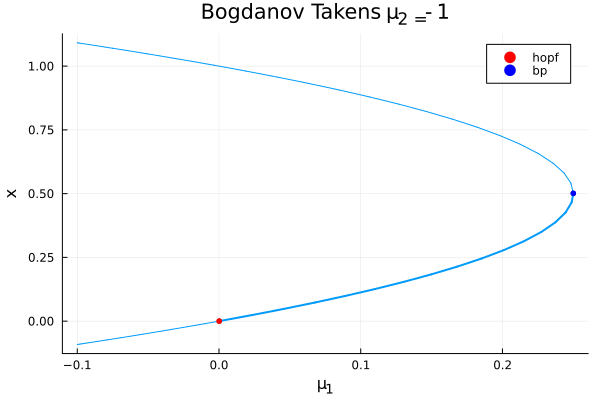

In [14]:
takens(u,p) = takens!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1, pMax=0.28, ds = 0.001, dsmax = 0.02,detectBifurcation = 3)
FJ = BifurcationKit.getJet(takens,(z,p) -> ForwardDiff.jacobian(x -> takens(x,p), z))
br1, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-1.0],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
plot(br1,xlabel="\\mu_1",title="Bogdanov Takens \\mu_2 =-1",fmt=:png)

Ahora estamos listos para trazar la curva SN en el espacio de parámetros $(\mu_1,\mu_2)$. Para ello tomamos el segundo punto especial de esta rama $br1$ que corresponde a la saddle node (indicado bp) y lo continuamos variando $\mu_1$ entre -1 y 1, indicando que detecte bifurcaciones de codimension 2 sobre esa curva.

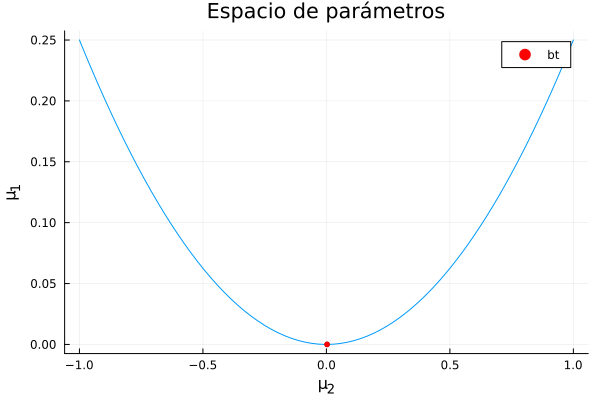

In [15]:
SN, = continuation(FJ[1],FJ[2],br1,2,(@lens _[2]), ContinuationPar(opts, pMin=-1.0,pMax=1.0); 
    detectCodim2Bifurcation=2,updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
plot(SN,xlabel="\\mu_2",ylabel="\\mu_1",title="Espacio de parámetros",fmt=:png)

Que tal como esperábamos es una parábola (la condición para la SN era $\mu_1=\frac{\mu_2^2}{4}$) y además detectó la Bogdanov-Takens en el origen (bt). 

La curva de la Hopf la continuamos de forma similar indicando que vamos a seguir el primer punto especial de br1. Graficamos ambas curvas en el espacio de parámetros

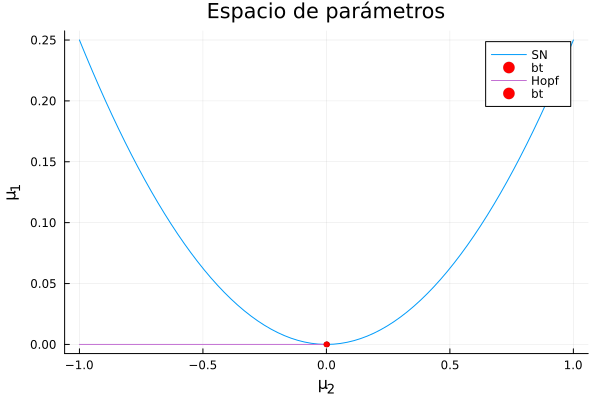

In [16]:
H, = continuation(FJ[1],FJ[2],br1,1,(@lens _[2]), ContinuationPar(opts, pMin=-1.0,pMax=0.1);
    detectCodim2Bifurcation=2,startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,
    bdlinsolver = MatrixBLS())
plot(SN,branchlabel="SN")
plot!(H,branchlabel="Hopf",xlabel="\\mu_2",ylabel="\\mu_1",title="Espacio de parámetros",fmt=:png)

Notar que el punto de codimension 2 figura 2 veces porque lo detecto en ambas curvas. BifurcationKit no nos permite calcular bifurcaciones globales (afaik)

## Bogdanov Takens con terminos cubicos

Como puede verse la bifurcacion BT presenta una dinamica muy interesante y variada, con minimas alteraciones en los parametros se puede pasar de comportamientos oscilatorios, creacion de pares de puntos fijos y orbitas de periodo infinito (conexiones HC). El problma del sistema anterior es que tiene trayectorias divergentes, por lo cual necesitamos agregar terminos de orden mas alto (que no van a alterar la bifurcacion de BT aunque si pueden cambiar el diagrama de bifurcaciones fuera de ese punto) que aseguren que las trayectorias no diverjan. De vuelta hay varias alternativas, vamos a seguir la que propone Mindlin:

$\dot{x} = y$

$\dot{y} = \mu_1+\mu_2x+ x^2 -xy - x^3 -x^2y$ 

En este caso al tener terminos cubicos vamos a tener de forma general uno o tres puntos fijos, como en el caso de la cusp los puntos fijos pasan de ser 1 a 3 a traves de bifurcaciones de nodo silla que ocurren en pares de puntos distintos. De hecho los terminos cubicos lo que hacen es introducir una cusp ademas de la Bogdanov-Takens.

Vamos a ver como se organizan las variedades a partir de estos nuevos términos

In [17]:
function takens3!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+u[1]*(p[2]-u[2]+u[1]*(1-u[1]-u[2]))
    du
end    

takens3! (generic function with 1 method)

In [18]:
@manipulate throttle=0.1 for μ1=-0.15:0.001:0.1,μ2=-0.4:0.001:0.1
    phase_portrait(takens3!,[μ1,μ2];tmax=300,xlims=[-1,1],ylims=[-0.5,0.5])
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 251, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
126, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000865409c0, Task (runnable) @0x00000000865409c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.15\",\"-0.149\",\"-0.148\",\"-0.147\",\"-0.146\",\"-0.145\",\"-0.144\",\"-0.143\",\"-0.142\",\"-0.141\",\"-0.14\",\"-0.139\",\"-0.138\",\"-0.137\",\"-0.136\",\"-0.135\",\"-0.134\",\"-0.133\",\"-0.132\",\"

Este retrato de fase nos puede resultar conocido, sobre todo si fijamos $\mu_1$ en un valor negativo y variamos $\mu_2$. Para valores crecientes de $\mu_2$ observamos una saddle node sobre el ciclo límite que previo a la bifurcación va formando un "pico" apretado por la nulclina de $\dot{y}=0$ tal como vimos cuando presentamos esta bifuración. De hecho el sistema es el mismo.

Esta saddle node es diferente de la otra rama en forma de parábola de la BT original que me aniquila los dos puntos de la izquierda. Por lo tanto es de esperar que tengamos otra curva diferente de SN en el espacio de parámetros, que como vamos a ver se aniquila con una rama de la curva SN parabolica SN original de Bogdanov Takens.

Pero vamos por partes. Vamos a usar BifurcationKit porque en este caso es mas engorroso calcular a mano las curvas. Lo primero es fijar $\mu_2$ en un valor donde estemos seguros que vamos a cortar la SN (y de paso la Hopf) variando $\mu_1$. Lo mas seguro es a la izquierda de la BT. En este caso tomamos $\mu_1=-0.1$ y variamos $\mu_1$ en el rango $(-0.1,0.2)$.

[:hopf, :bp, :bp]

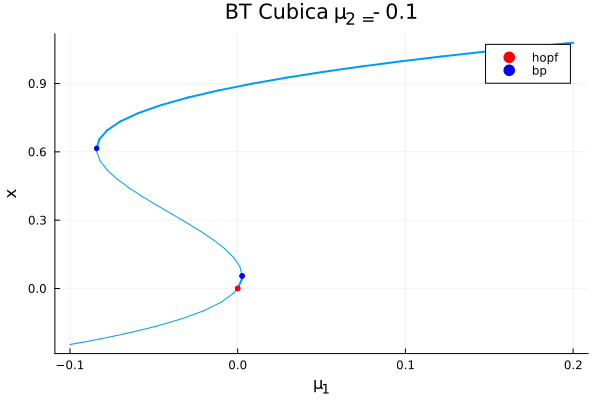

In [19]:
takens3(u,p) = takens3!(similar(u),u,p,0)
opts = ContinuationPar(pMin=-0.1, pMax=0.2, ds = 0.001, dsmax = 0.02,detectBifurcation = 3)
FJ = BifurcationKit.getJet(takens3,(z,p) -> ForwardDiff.jacobian(x -> takens3(x,p), z))
br1, = continuation(FJ[1],FJ[2],[-0.9;-0.1],[-0.1,-0.1],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
print([pt.type for pt in br1.specialpoint])
plot(br1,xlabel="\\mu_1",title="BT Cubica \\mu_2 =-0.1",fmt=:png)

Podemos ver que detecto tres puntos especiales, le pedimos que imprima su tipo para luego elegir cual vamos a continuar para calcular las ramas. Tal como anticipamos tenemos dos bifurcaciones SN vamos a continuar una de ellas para ver si se una con la otra en una cusp. Esto lo hacemos en el diagrama de abajo tomando el punto especial 3 y variando $\mu_2$ en un amplio rango.

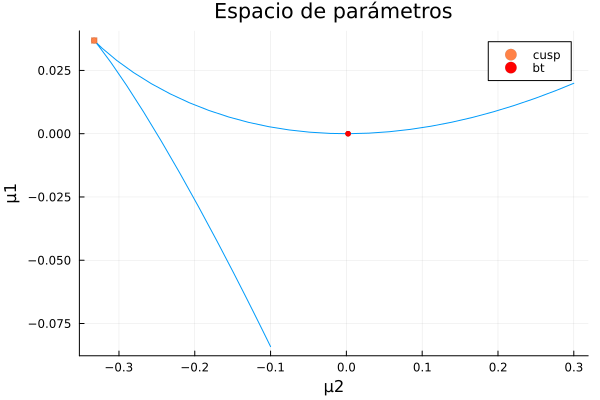

In [20]:
SN, = continuation(FJ[1],FJ[2],br1,3,(@lens _[2]), ContinuationPar(opts, pMin=-0.4,pMax=0.3,ds=-0.001); 
    detectCodim2Bifurcation=2,updateMinAugEveryStep = 1,bdlinsolver = MatrixBLS())
plot(SN,title="Espacio de parámetros",xaxis=("μ2"),yaxis=("μ1"),fmt=:png)

Como habiamos sospechado las dos ramas de SN se unen en un punto cusp de codimension 2, por lo tanto no vamos a tener que continuar la otra curva SN. Vamos ahora por la Hopf que quedo inalterada por los nuevos terminos y es una linea horizontal en $\mu_1=0$ para valores de $\mu_2$ negativos:

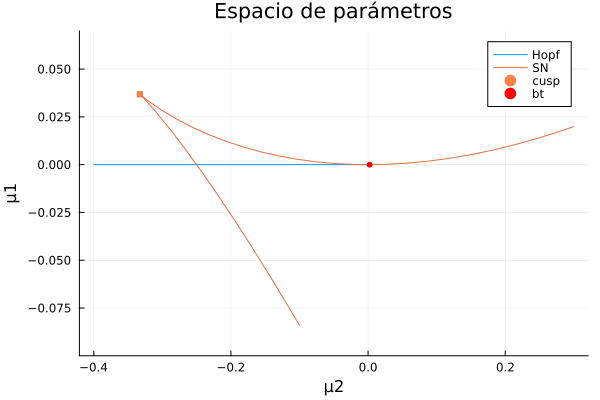

In [21]:
br2, = continuation(FJ[1],FJ[2],[-0.9;0],[-0.1,-0.4],(@lens _[1]),opts,recordFromSolution = (x, p) -> x[1])
H, = continuation(FJ[1],FJ[2],br2,1,(@lens _[2]), ContinuationPar(opts, pMin=-0.4,pMax=0.1);
    detectCodim2Bifurcation=2,startWithEigen=true,d2F=FJ[3],d3F =FJ[4],updateMinAugEveryStep = 1,
    bdlinsolver = MatrixBLS())
p1=plot(H,branchlabel="Hopf",plotspecialpoints=false,fmt=:png)
plot!(p1,SN,branchlabel="SN",ylims=(-0.1,0.07),xaxis=("μ2"),yaxis=("μ1"),title="Espacio de parámetros")

En este diagrama nos falta la bifurcacion homoclínica que se origina en el punto BT. La presencia de los términos cúbicos la modifica porque tiene que acoplarse a la otra rama de la SN de forma tangencial. No hay una expresión sencilla para esta curva por lo que calculamos de forma numérica. La siguiente subsección se puede saltear y pasar directamente al diagrama final.

## Calculo analitico de la curva SN y computo numerico de la Homoclinica 
## [recontra-optativo]

Dijimos que era engorroso el calculo de la curva SN de forma analítica, aca damos solo la expresión final, pero se puede llegar por argumentos similares a los que utilizamos en el análisis de la función cúbica para la Saddle Node Heteroclínica (si bien en ese caso era un poco mas sencillo porque $\mu_2=0$). 

Las ramas de la curva SN quedan determinadas por:

$\mu_1 = -\frac{1}{9} \left[ 3\mu_2+2/3\pm (2\mu_2+2/3)\sqrt{1+3\mu_2})\right]$

definidas para $\mu_2>-1/3$. De hecho para $\mu_2=-1/3$, $\mu_1=1/27$ tenemos el punto cusp. 

Lo que vamos a hacer es colocarnos sobre la curva SN para un valor de $\mu_1$ definido negativo (que corresponde a la rama con el signo +) e integrar el sistema para determinar si persiste la orbita periodica que esta a la izquierda de la curva. Si persiste es porque todavia no cruzamos el saddle loop. Incrementamos entonces el valor de $\mu_2$ un $\delta$ pequeño hasta que la orbita periódica desaparece y marcamos ese punto como el valor de ($\mu_1,\mu_2$) que corresponde a la bifurcación homoclinica. La forma de detectar la orbita periodica es dejar pasar un transitorio y fijarse en la amplitud de oscilación de la variable $y$. Como solo hay atractores y ciclos límites si la amplitud de oscilación (yrange) está por encima de cierto umbral entonces asumimos que tenemos un ciclo límite. Este es un método poco riguroso pero que a veces ofrece mejor resultado que intentar seguir las variedades estable e inestable del punto silla y buscar intersecciones.

In [22]:
# traceamos la homclinica
delta = 0.0001
m2 = -0.249:0.002:0.0
m1a = @. -(3*m2+2/3+(2/3+2.0*m2)*sqrt(1+3.0*m2))/9.0
#m1a = @. -(m2+(2/3+2.0*m2)*(1+sqrt(1+3.0*m2)))/9.0
HCL = []
for n in 1:length(m2)
    yrange = 1.0
    μ2 = m2[n]
    while yrange>0.0001
        sol = solve(ODEProblem(takens3!, [0.0; 0.0], (0, 300.0), [m1a[n],μ2]))
        yrange = maximum(getindex.(sol.u,2)[end-10:end])-minimum(getindex.(sol.u,2)[end-10:end])
        μ2 += delta
    end    
    append!(HCL,μ2-delta)
end    

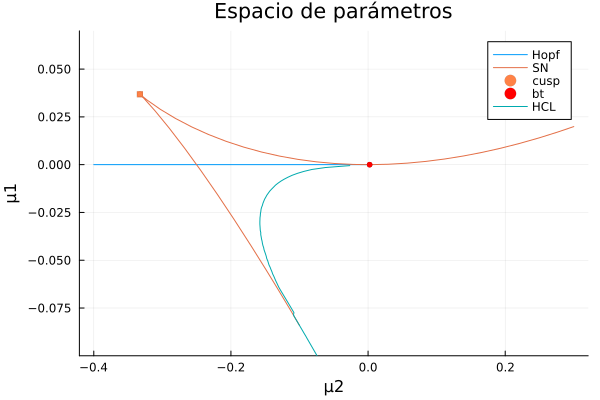

In [23]:
p1=plot(H,branchlabel="Hopf",plotspecialpoints=false)
plot!(p1,SN,branchlabel="SN",ylims=(-0.1,0.07),xaxis=("μ2"),yaxis=("μ1"),title="Espacio de parámetros")
plot!(p1,HCL,m1a,label="HCL",fmt=:png)

Y tenemos el diagrama de bifurcaciones en el espacio de parametros completo!

Vamos a expolorarlo ahora de forma interactiva viendo el retrato de fases y la posicion en el espacio de parametros de forma simultanea

In [24]:
@manipulate throttle=0.1 for μ1=-0.25:0.001:0.1,μ2=-0.4:0.001:0.1
    p2=phase_portrait(takens3!,[μ1,μ2];tmax=300,xlims=[-0.7,0.7],ylims=[-0.5,0.5])
    p1=plot(H,branchlabel="Hopf",plotspecialpoints=false)
    plot!(p1,HCL,m1a,label="HCL")
    plot!(p1,SN,branchlabel="SN",ylims=(-0.1,0.07),xaxis=("μ2"),yaxis=("μ1"))
    scatter!(p1,[μ2],[μ1],label=false)
    plot(p1,p2,layout=(1,2),size=(900,400))
end  

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 351, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
176, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000086491750, Task (runnable) @0x0000000086491750), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.25\",\"-0.249\",\"-0.248\",\"-0.247\",\"-0.246\",\"-0.245\",\"-0.244\",\"-0.243\",\"-0.242\",\"-0.241\",\"-0.24\",\"-0.239\",\"-0.238\",\"-0.237\",\"-0.236\",\"-0.235\",\"-0.234\",\"-0.233\",\"-0.232\",\"